In [1]:
'''Clear out temporary variables and get a clean session'''
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
from sklearn.decomposition import PCA

import missingno as msno

%matplotlib inline

In [3]:
'''Open pickled file'''
with open('ib_interview_pca.pkl', 'rb') as f:
    df = pickle.load(f)

In [4]:
df.head()

,PC1,PC2,program_admit
0,1.633937,-0.152389,IB-Accepted
1,0.148195,-0.191465,IB-Accepted
2,1.671864,0.226241,IB-Accepted
3,0.455700,1.030539,IB-Accepted
4,-0.349227,-0.920333,IB-Accepted


In [7]:
'''Create Silhouette and Centroid plots'''

def kmeans_evaluation(X, cluster_range):
    for n_cluster in cluster_range:
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
        ax1.set_xlim([-.1, 1])
        ax1.set_ylim([0, len(X) + (n_cluster+1) * 10])

        clusterer = KMeans(n_clusters = n_cluster, init = 'k-means++', n_init = 300, max_iter = 500, random_state = 42)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For number of clusters = :', n_cluster, "The average silhouette score is ", silhouette_avg)

        sample_sil_values = silhouette_samples(X, cluster_labels)

        '''Sihouette Plots'''
        y_lower = 10
        for i in range(n_cluster):
            ith_sil_value = sample_sil_values[cluster_labels == i]
            ith_sil_value.sort()

            size_cluster_i = ith_sil_value.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i)/n_cluster)
            ax1.fill_betweenx(
            np.arange(y_lower, y_upper), 
                0,
                ith_sil_value,
                facecolor = color,
                edgecolor = color,
                alpha = .7
            )

            ax1.text(-.5, y_lower + .5 * size_cluster_i, str(i))
            y_lower = y_upper +10

            ax1.set_title('Silhouette plot for various clusters')
            ax1.set_xlabel('Silhouette coefficient values')
            ax1.set_ylabel('Cluster label')

            ax1.axvline(x=silhouette_avg, color = 'r', linestyle = '--')

            ax1.set_yticks([])
            ax1.set_xticks([-.1,0,.2,.4,.6,.8,1])

            '''Cluster plots'''
            color = cm.nipy_spectral(cluster_labels.astype(float)/n_cluster)
            ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker = '.', s=30, lw=0, alpha=.7, c=color, edgecolor = 'k')

            centers = clusterer.cluster_centers_
            ax2.scatter(
                centers[:, 0],
                centers[:, 1],
                marker = 'o',
                c='white',
                alpha = 1,
                s=200,
                edgecolor = 'k'
            )

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker = '$%d$' %i, alpha=1, s=50, edgecolor = 'k')

            ax2.set_title('Visualization of clustered data')
            ax2.set_xlabel('Feature space for 1st feature')
            ax2.set_ylabel('Feature space for 2nd feature')

            plt.suptitle(
                'Silhouette analysis for KMeans clustering on sample data with n_clusters = %d'
                % n_cluster,
                fontsize = 14,
                fontweight = 'bold'
            )

For number of clusters = : 2 The average silhouette score is  0.4211682222059056
For number of clusters = : 3 The average silhouette score is  0.34935747294672853
For number of clusters = : 4 The average silhouette score is  0.37450953936902587
For number of clusters = : 5 The average silhouette score is  0.3464573677193578
For number of clusters = : 6 The average silhouette score is  0.3415025150387475
For number of clusters = : 7 The average silhouette score is  0.33898440578324396


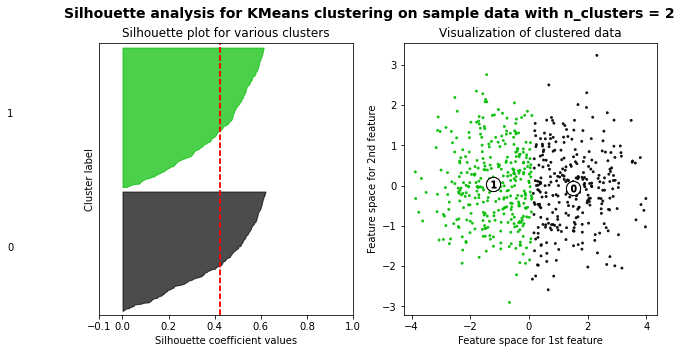

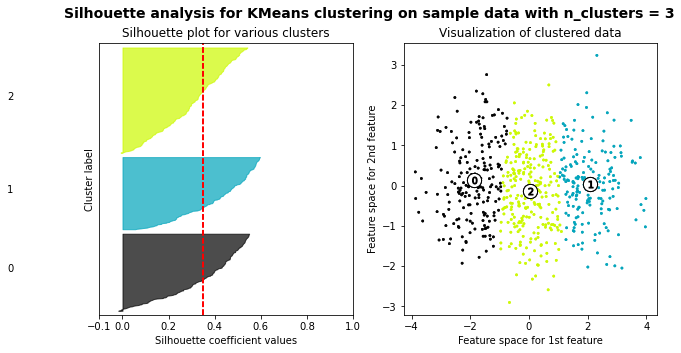

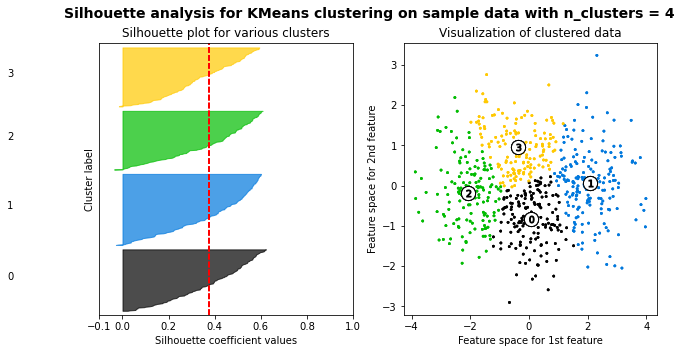

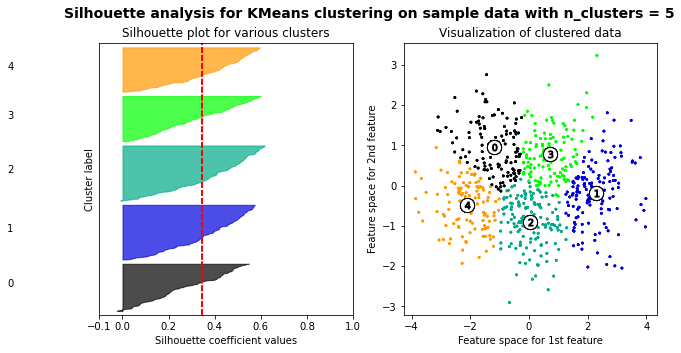

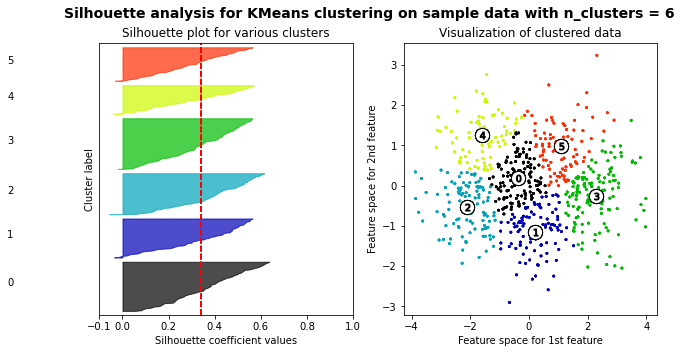

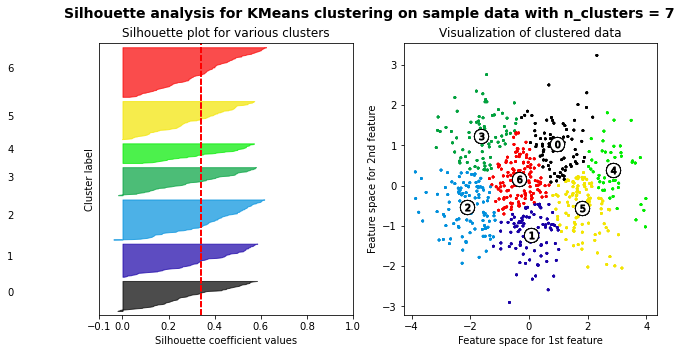

In [6]:
'''Create KMeans model'''
X = df.drop('program_admit', axis = 1)
y = df['program_admit']

cluster_range = np.arange(2,8)
kmeans_evaluation(X, cluster_range)

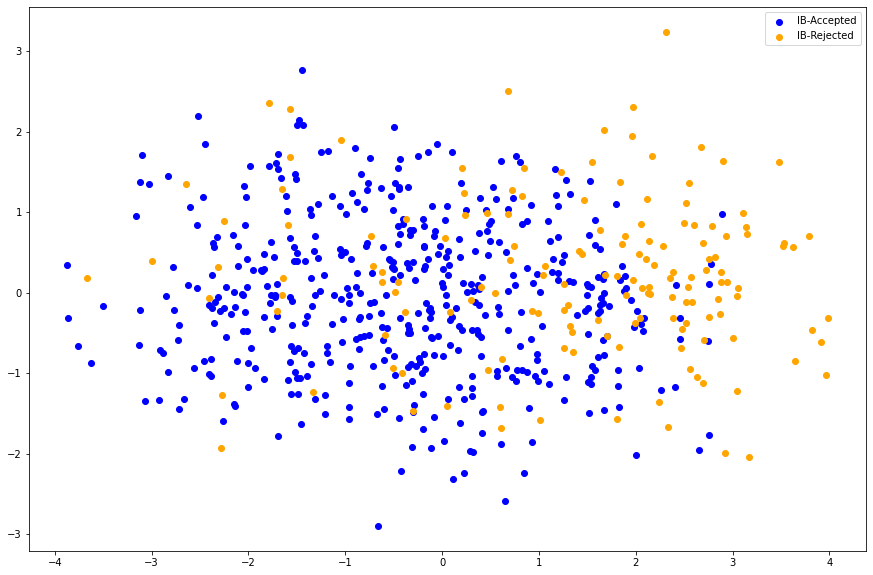

In [8]:
'''Plot data against acceptance status'''
fig, ax = plt.subplots(figsize = (15, 10))

color_dict = {}
color_list = ['b', 'orange']
admit_status = pd.Series(list(df['program_admit']))
for index, status in enumerate(df['program_admit'].unique()):
    color_dict[status] = color_list[index]

for index, status in enumerate(df['program_admit'].unique()):
    ix = np.where(df['program_admit'] == status)
    ax.scatter(x = X['PC1'].to_numpy()[ix], y = X['PC2'].to_numpy()[ix], c = color_dict[status], label = status)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend()

In [9]:
'''Open pickled file'''
with open('magnet_interview_pca.pkl', 'rb') as f:
    df = pickle.load(f)

For number of clusters = : 2 The average silhouette score is  0.426766364866393
For number of clusters = : 3 The average silhouette score is  0.3307356371224951
For number of clusters = : 4 The average silhouette score is  0.3601465098923273
For number of clusters = : 5 The average silhouette score is  0.35335925328597745
For number of clusters = : 6 The average silhouette score is  0.3551871513226256
For number of clusters = : 7 The average silhouette score is  0.3446968365681852


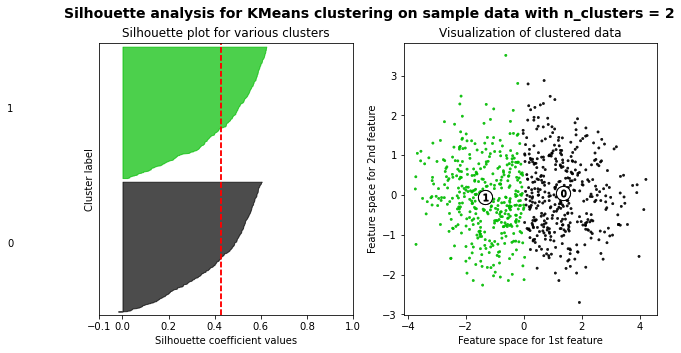

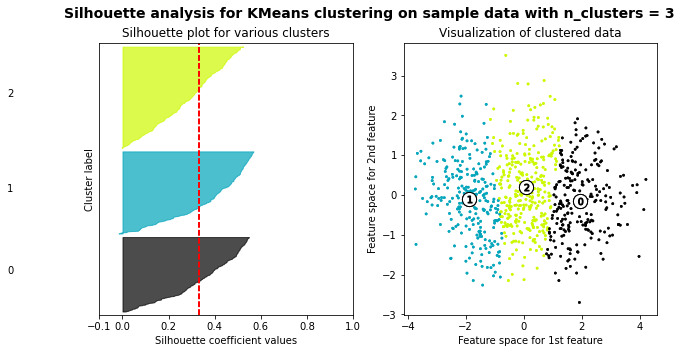

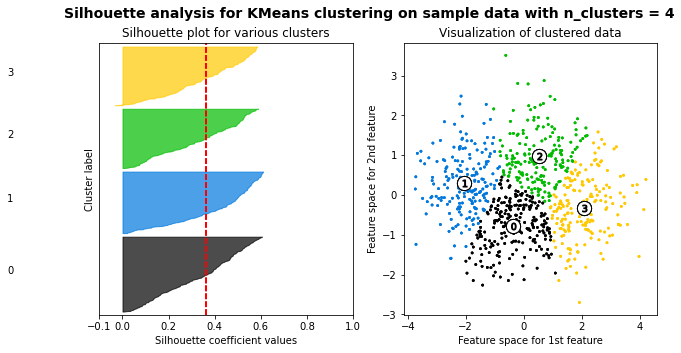

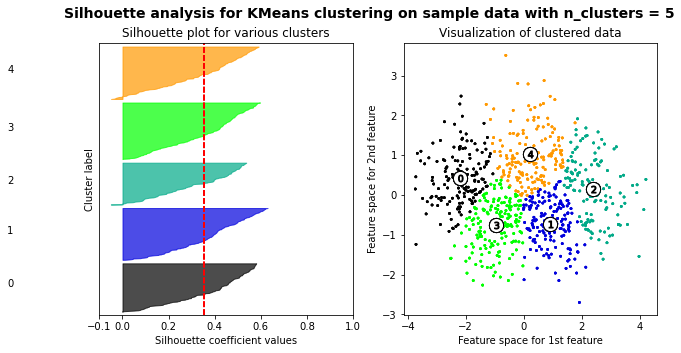

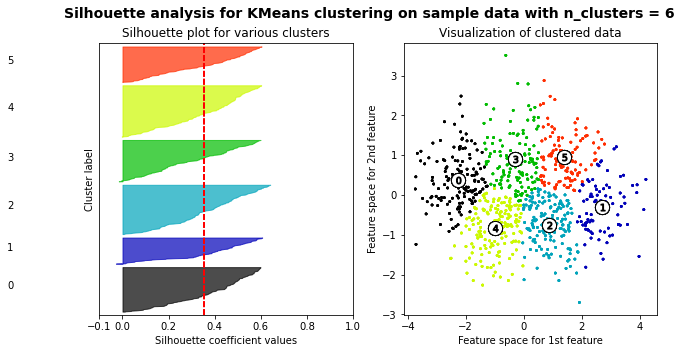

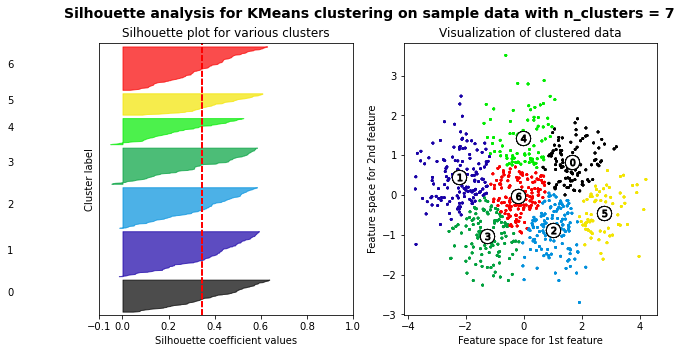

In [10]:
'''Create KMeans model'''
X = df.drop('program_admit', axis = 1)
y = df['program_admit']

cluster_range = np.arange(2,8)
kmeans_evaluation(X, cluster_range)

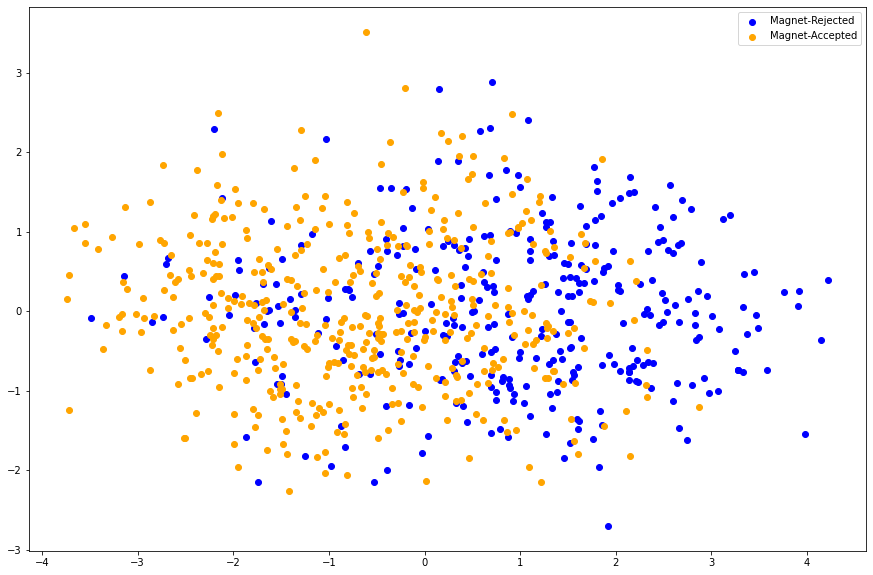

In [11]:
'''Plot data against acceptance status'''
fig, ax = plt.subplots(figsize = (15, 10))

color_dict = {}
color_list = ['b', 'orange']
admit_status = pd.Series(list(df['program_admit']))
for index, status in enumerate(df['program_admit'].unique()):
    color_dict[status] = color_list[index]

for index, status in enumerate(df['program_admit'].unique()):
    ix = np.where(df['program_admit'] == status)
    ax.scatter(x = X['PC1'].to_numpy()[ix], y = X['PC2'].to_numpy()[ix], c = color_dict[status], label = status)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend()

In [12]:
'''Open pickled file'''
with open('ib_no_interview_pca.pkl', 'rb') as f:
    df = pickle.load(f)

For number of clusters = : 2 The average silhouette score is  0.42985547012588887
For number of clusters = : 3 The average silhouette score is  0.3367834197349974
For number of clusters = : 4 The average silhouette score is  0.3602702127850539
For number of clusters = : 5 The average silhouette score is  0.3378362035575816
For number of clusters = : 6 The average silhouette score is  0.3437842828308671
For number of clusters = : 7 The average silhouette score is  0.3254724353842221


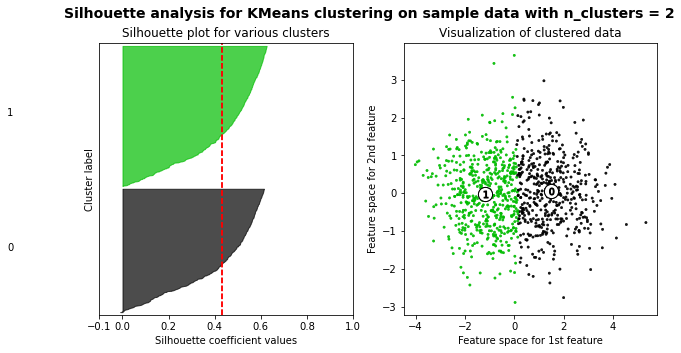

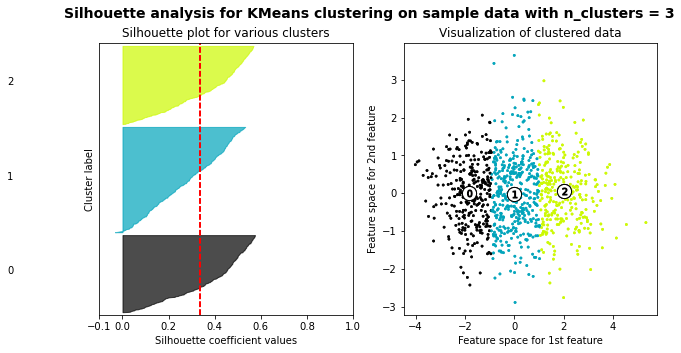

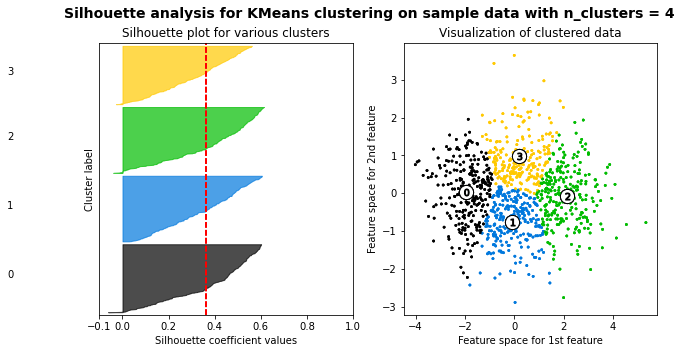

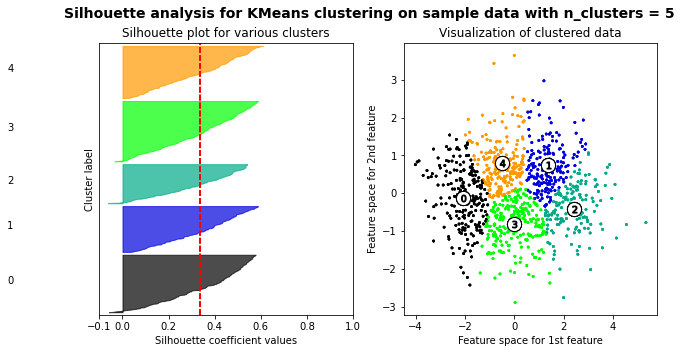

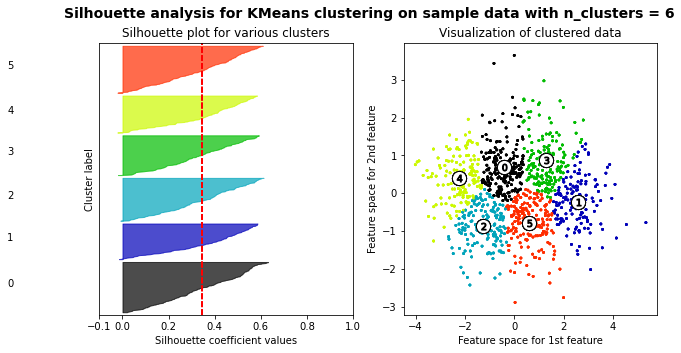

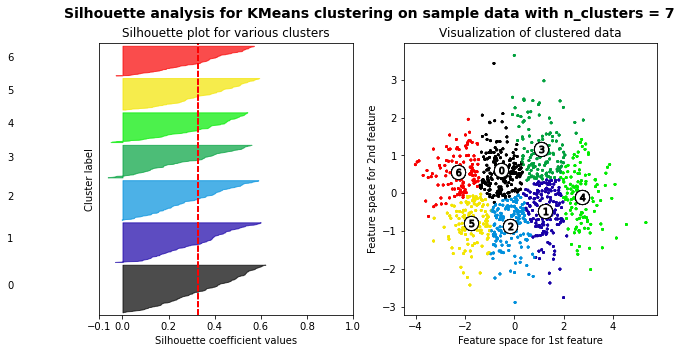

In [13]:
'''Create KMeans model'''
X = df.drop('program_admit', axis = 1)
y = df['program_admit']

cluster_range = np.arange(2,8)
kmeans_evaluation(X, cluster_range)

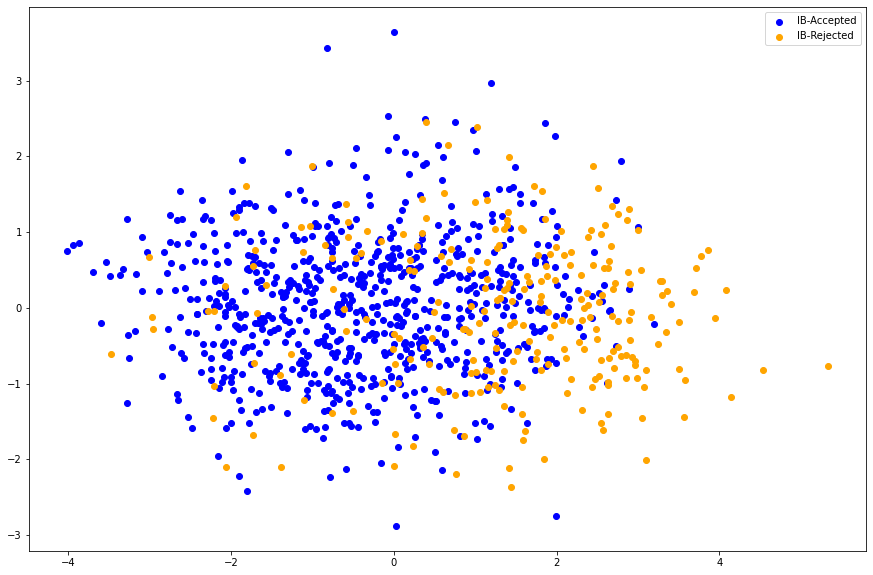

In [14]:
'''Plot data against acceptance status'''
fig, ax = plt.subplots(figsize = (15, 10))

color_dict = {}
color_list = ['b', 'orange']
admit_status = pd.Series(list(df['program_admit']))
for index, status in enumerate(df['program_admit'].unique()):
    color_dict[status] = color_list[index]

for index, status in enumerate(df['program_admit'].unique()):
    ix = np.where(df['program_admit'] == status)
    ax.scatter(x = X['PC1'].to_numpy()[ix], y = X['PC2'].to_numpy()[ix], c = color_dict[status], label = status)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend()

In [15]:
'''Open pickled file'''
with open('magnet_no_interview_pca.pkl', 'rb') as f:
    df = pickle.load(f)

For number of clusters = : 2 The average silhouette score is  0.41826518525369133
For number of clusters = : 3 The average silhouette score is  0.33445844899034316
For number of clusters = : 4 The average silhouette score is  0.32976908133358934
For number of clusters = : 5 The average silhouette score is  0.32658997639807746
For number of clusters = : 6 The average silhouette score is  0.3386446335704733
For number of clusters = : 7 The average silhouette score is  0.34630459081758463


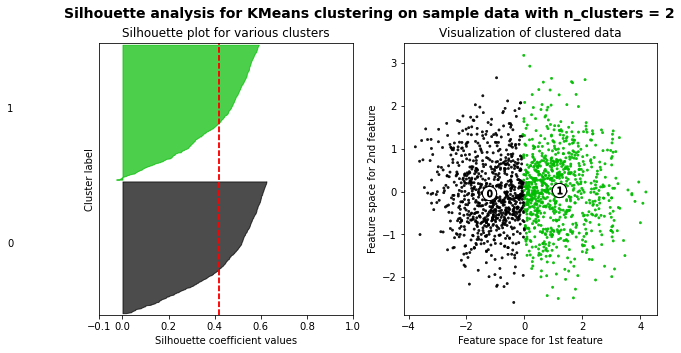

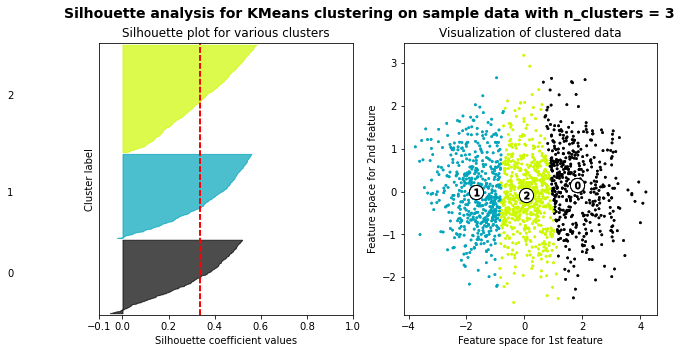

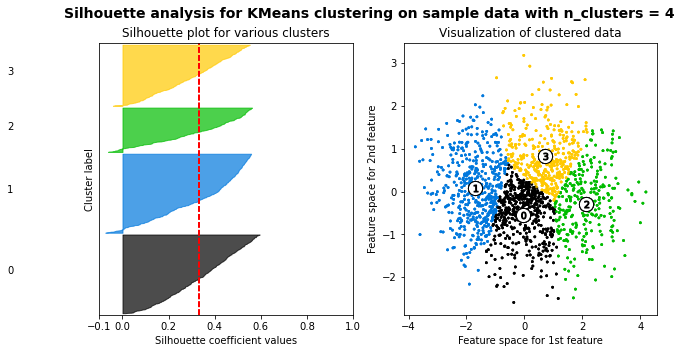

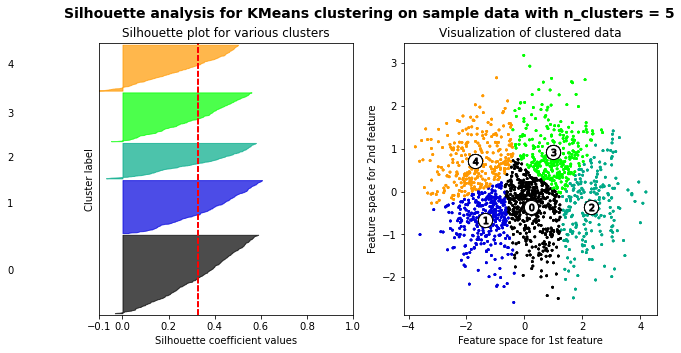

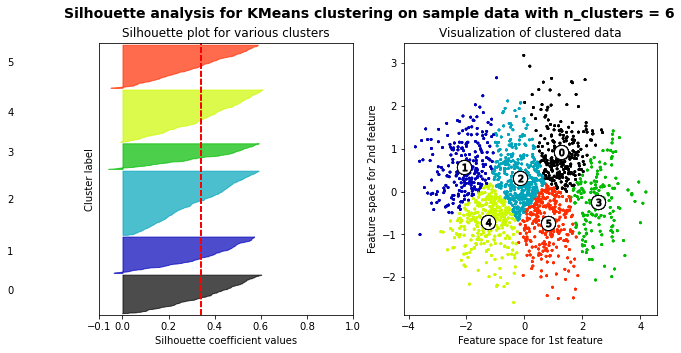

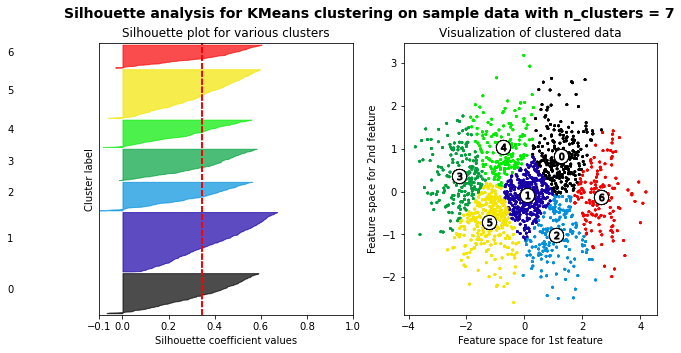

In [16]:
'''Create KMeans model'''
X = df.drop('program_admit', axis = 1)
y = df['program_admit']

cluster_range = np.arange(2,8)
kmeans_evaluation(X, cluster_range)

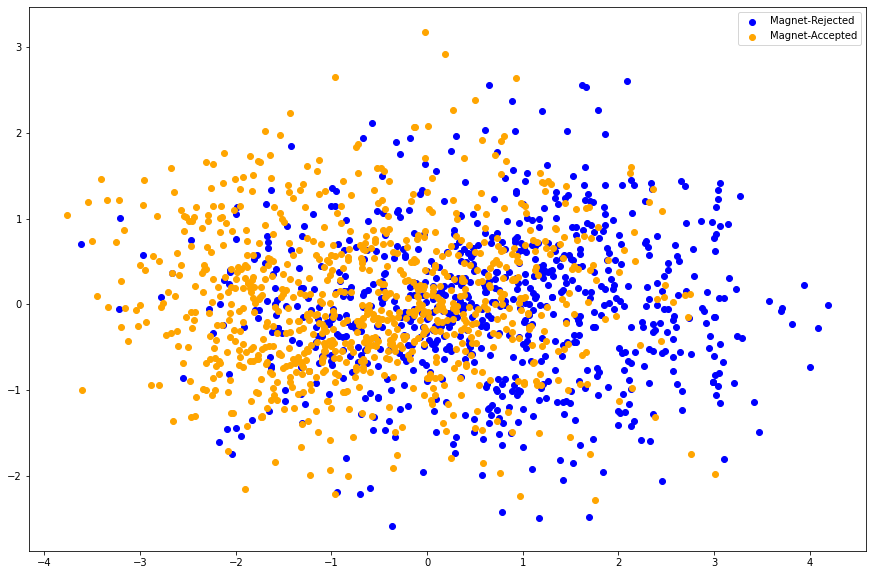

In [17]:
'''Plot data against acceptance status'''
fig, ax = plt.subplots(figsize = (15, 10))

color_dict = {}
color_list = ['b', 'orange']
admit_status = pd.Series(list(df['program_admit']))
for index, status in enumerate(df['program_admit'].unique()):
    color_dict[status] = color_list[index]

for index, status in enumerate(df['program_admit'].unique()):
    ix = np.where(df['program_admit'] == status)
    ax.scatter(x = X['PC1'].to_numpy()[ix], y = X['PC2'].to_numpy()[ix], c = color_dict[status], label = status)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend()